# Lab 5

## Binomial distribution
______

#### Simple Bayesian inference using the binomial distribution

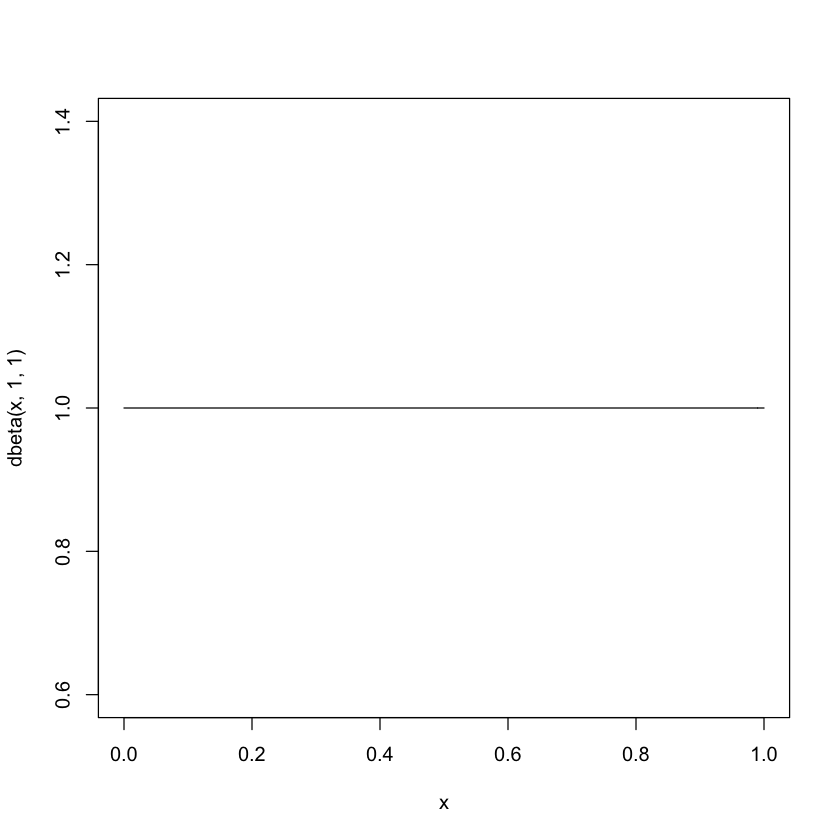

In [2]:
## Let's say you throw a coin 15 times in a row and you count each
## heads as 1 and each tails as 0. The results can be summarized by
## two numbers, for example:
k = 2
n = 15

## It is natural to assume that this data come from a binomial
## distribution with an unknown probability, theta, of observing a 1
## (or heads):
##
## k ~ binomial(theta, n)

## Let's consider a uniform prior on theta. Since the possible values
## of theta are restricted to the [0, 1] interval, the uniform prior
## on theta is just p(theta) = 1. This is the same distribution as
## Beta(1, 1), see?
par(bg = 'white')

curve(dbeta(x, 1, 1), 0, 1)

## The function dbeta gives the density function of the beta
## distribution, and the function curve plots the results of applying
## the expression provided as the first argument to a range of values
## from start to end, where start and end are the second and the third
## argument to the curve function. The expression has to have the
## variable x in it - this is what the numbers from start to end get
## assigned to when calculating the curve.

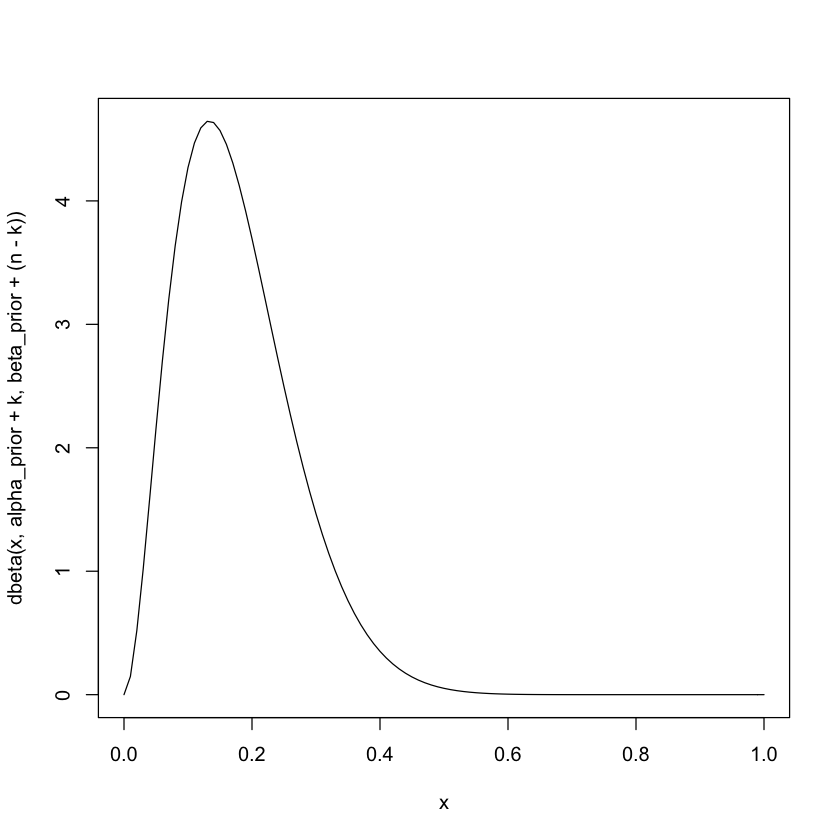

In [3]:
## If we have a binomial likelihood and the prior is a Beta
## distribution, defined in this case by:
alpha_prior = 1
beta_prior = 1
## then the posterior is given by
##
## p(theta|k) = Beta(alpha_prior + k, beta_prior + (n - k))
##
## and this is how it looks like in our case
par(bg = 'white')

curve(dbeta(x, alpha_prior + k, beta_prior + (n - k)), 0, 1)

In [10]:
## We can sample from this posterior if we want - the function rbeta
## generates pseudo-radom (hence the prefix r) samples from a Beta
## distribution.
samples = rbeta(10000, alpha_prior + k, beta_prior + (n - k))
## but it does not make much sense in this case since we know the
## exact shape of the posterior; we do not have to approximate it by
## (a lot of) samples.

head(samples)

[1] 0.1482787 0.1080135 0.2628398 0.1767133 0.1770131 0.0640761

In [5]:
## The function qbeta (with the prefix q) gives quantiles of a Beta
## distribution. For instance, if we want to know the value of theta
## such that some particular Beta distribution (defined by some alpha
## and some beta, so a particular Beta distribution) has 10% of its
## mass to the left of that theta then we just call qbeta(.1, alpha,
## beta). So, if we want to calculate the 95% posterior credible
## interval around theta then we just have to do this:
qbeta(c(.025, .975), alpha_prior + k, beta_prior + (n - k))

[1] 0.04047373 0.38347624

In [6]:
## Because .5 is well outside the posterior 95% credible interval for
## theta we can say that our model + data strongly indicate that the
## true probability of heads is not .5. We can ask, for instance, how
## probable it is that the true theta is lower then or equal to .4
## using the pbeta function (with the p prefix). This function is the
## inverse of the qbeta function - given some value of theta (and some
## values of alpha and beta so that we have a particular Beta
## distribution) it tells us the area under the density curve to the
## left of that theta (so this is a Cumulative Density Function, or
## CDF for short):
pbeta(.4, alpha_prior + k, beta_prior + (n - k))

[1] 0.9816628

In [7]:
## As you can see, the model + the data strongly indicate (there is a
## 98 percent posterior probability) that the true theta is lower than
## or equal to .4

## Or, we can ask what is the probability that the true theta is
## between .1 and .3 - we just have to subtract the are to the left of
## .1 from the area to the left of .3
pbeta(.3, alpha_prior + k, beta_prior + (n - k)) - pbeta(.1, alpha_prior + k, beta_prior + (n - k))

## etc.

## Things are not so simple when we have more than one 'condition', or
## when we have some quantitative predictor(s), or when the prior is
## not a Beta distibution.

[1] 0.6898897